## Interpolation with grid refinement

yt_xarray : [INFO ] 2024-03-12 14:12:42,102:  Creating image mask for grid decomposition.
yt_xarray : [INFO ] 2024-03-12 14:12:42,290:  Decomposing image mask and building yt dataset.
yt_xarray : [INFO ] 2024-03-12 14:12:42,318:  Decomposed into 339 grids after 401 iterations.
yt : [INFO     ] 2024-03-12 14:12:42,360 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 14:12:42,361 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2024-03-12 14:12:42,361 Parameters: domain_left_edge          = [-6356. -6366. -6372.]
yt : [INFO     ] 2024-03-12 14:12:42,362 Parameters: domain_right_edge         = [6369. 6366. 6372.]
yt : [INFO     ] 2024-03-12 14:12:42,362 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 14:12:42,636 xlim = -6372.000000 6372.000000
yt : [INFO     ] 2024-03-12 14:12:42,636 ylim = -6356.000000 6369.000000
yt : [INFO     ] 2024-03-12 14:12:42,638 xlim = -6372.000000 6372.000000
yt : [INFO     ] 2024-03-12 14:12:42,6


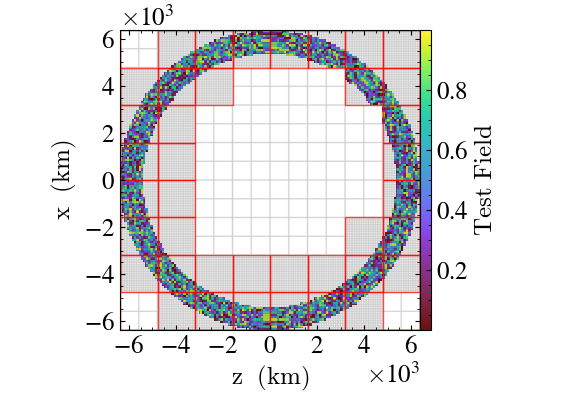

In [6]:
from yt_xarray.utilities._utilities import (
    construct_minimal_ds,
)
from yt_xarray.transformations import build_interpolated_cartesian_ds
import yt 

dim_names = ("longitude", "latitude", "depth")


ds = construct_minimal_ds(    
    min_x=0, 
    max_x=360,
    x_stretched=False,
    x_name=dim_names[0],
    n_x=50,
    min_y=-90., 
    max_y=90,
    y_stretched=False,
    y_name=dim_names[1],
    n_y=60,    
    z_stretched=False,
    z_name=dim_names[2],
    n_z=80,
    min_z=0.0,
    max_z=1000.0, 
)

fields = list(ds.data_vars)

# for max_iters in (50, 100, 200, 400, 600, 800, 1000):
for max_iters in (400,):    
    ds_yt = build_interpolated_cartesian_ds(
        ds, 
        ('test_field',),
        'depth', 
        grid_resolution = (16,16,16),      
        refine_grid=True,
        refine_max_iters=max_iters,
        refine_min_grid_size=4, 
        refine_by=8,
    )
    
    slc = yt.SlicePlot(ds_yt, 'y', ('test_field'), window_size=(3,3))
    slc.set_log('test_field', False)
    slc.annotate_cell_edges(alpha=0.2)    
    slc.annotate_grids(edgecolors=(1.,0,0,0))
    slc.show()

yt_xarray : [INFO ] 2024-03-12 14:13:30,180:  Creating image mask for grid decomposition.
yt_xarray : [INFO ] 2024-03-12 14:13:30,366:  Decomposing image mask and building yt dataset.
yt_xarray : [INFO ] 2024-03-12 14:13:30,388:  Decomposed into 248 grids after 301 iterations.
yt : [INFO     ] 2024-03-12 14:13:30,431 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 14:13:30,431 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-03-12 14:13:30,432 Parameters: domain_left_edge          = [-3271. -5573.  2533.]
yt : [INFO     ] 2024-03-12 14:13:30,432 Parameters: domain_right_edge         = [ -334. -2832.  4870.]
yt : [INFO     ] 2024-03-12 14:13:30,433 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 14:13:30,980 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:30,981 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:30,983 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:


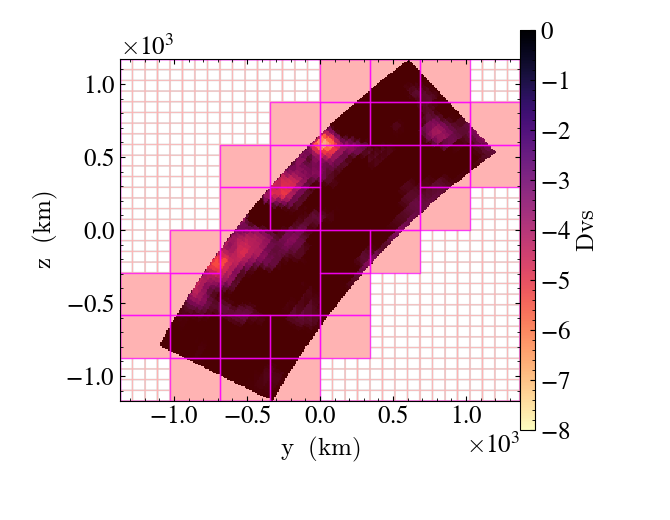

In [8]:
import xarray as xr
import yt_xarray
import yt
from yt_xarray import transformations

ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")
grid_resolution = (32, 32, 32)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "dvs",
    ],
    "depth",
    grid_resolution = grid_resolution, 
    refine_grid=True,    
    refine_max_iters=2000,
    refine_min_grid_size=8,
    refine_by=8,
)


slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'dvs'), window_size=(4,4))
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 0)
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,1,1))
slc.show()

yt : [INFO     ] 2024-03-12 14:13:39,902 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:39,902 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:39,904 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:39,905 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:39,906 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



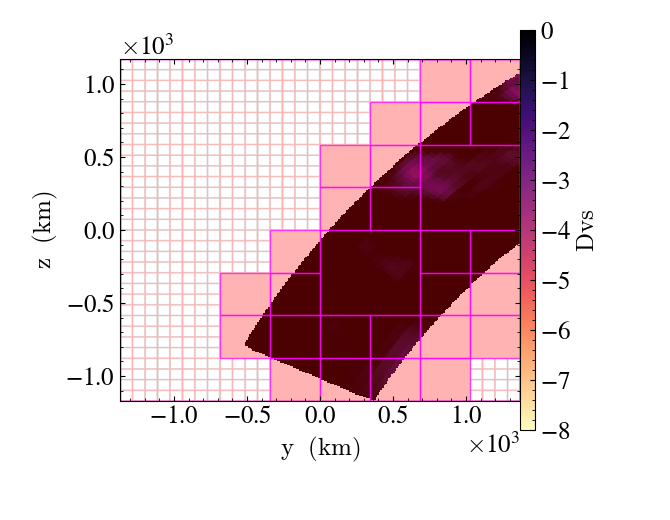

yt : [INFO     ] 2024-03-12 14:13:41,042 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:41,043 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:41,045 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:41,045 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:41,046 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



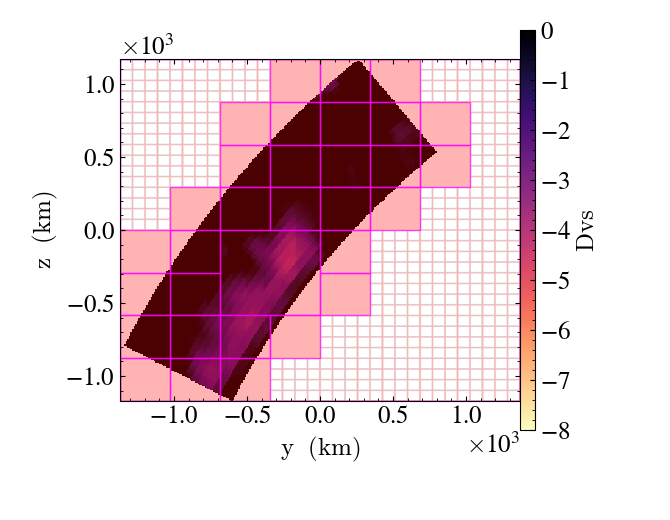

In [9]:
c = ds_yt.domain_center.copy()
c[0] = -3000.
slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'dvs'), window_size=(4,4), center=c)
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 0)
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,1,1))
slc.show()

c[0] = -800.
slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'dvs'), window_size=(4,4), center=c)
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), "magma_r")
slc.set_zlim(("stream", "dvs"), -8, 0)
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,1,1))
slc.show()

yt : [WARNING  ] 2024-03-12 14:13:47,192 Field ('stream', 'slow_dvs') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2024-03-12 14:13:47,193 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:47,193 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:47,195 xlim = -5573.000000 -2832.000000
yt : [INFO     ] 2024-03-12 14:13:47,196 ylim = 2533.000000 4870.000000
yt : [INFO     ] 2024-03-12 14:13:47,197 Making a fixed resolution buffer of (('stream', 'slow_dvs')) 800 by 800



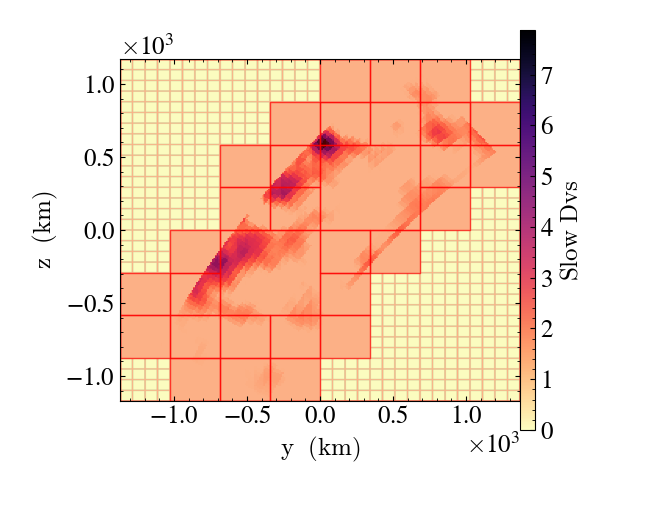

In [10]:
import numpy as np 

def _slow_vels(field, data):
    # return negative velocities only, 0 all other elements
    dvs = data['dvs'].copy()
    dvs[np.isnan(dvs)] = 0.0
    dvs[dvs>0] = 0.0
    return np.abs(dvs)

ds_yt.add_field(
    name=("stream", "slow_dvs"),
    function=_slow_vels,
    sampling_type="local",
)

slc = yt.SlicePlot(ds_yt, 'x', ('stream', 'slow_dvs'), window_size=(4,4))
slc.set_log(("stream", "slow_dvs"), False)
slc.set_cmap(("stream", "slow_dvs"), "magma_r")
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,0,1))
slc.show()

yt : [INFO     ] 2024-03-12 14:13:50,964 Rendering scene (Can take a while).
yt : [INFO     ] 2024-03-12 14:13:50,966 Creating volume
yt : [INFO     ] 2024-03-12 14:13:54,581 Creating transfer function


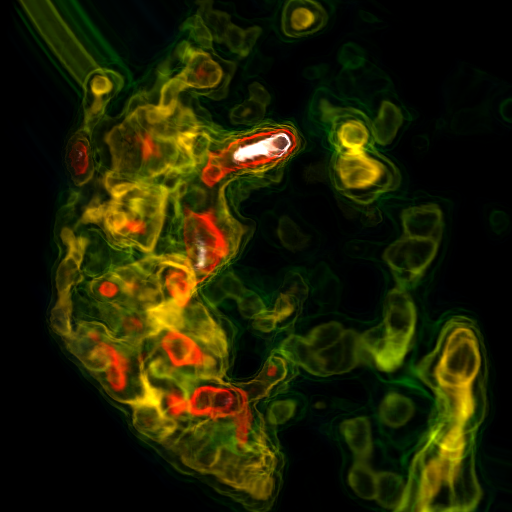

In [11]:
reg = ds_yt.region( ds_yt.domain_center, ds_yt.domain_left_edge, ds_yt.domain_right_edge)
reg

sc = yt.create_scene(reg, field=('stream', 'slow_dvs'))

cam = sc.add_camera(ds_yt)

source = sc[0]

# Set the bounds of the transfer function
source.tfh.set_bounds((0.1, 8))

# set that the transfer function should be evaluated in log space
source.tfh.set_log(True)

# source.tfh.plot("transfer_function.png", profile_field=('stream', 'slow_dvs'))
cam.zoom(2)
cam.yaw(100*np.pi/180)
cam.roll(220*np.pi/180)
cam.rotate(30*np.pi/180)

sc.show(sigma_clip=5.)
# sc.save('WUS_rendering.png', sigma_clip=5., render=False)
